# Επιστημονική Python

**This notebook is heavily infuenced by the work of Luke Polson ([check here](https://github.com/lukepolson)) and Dr. Thomas Erben @ University of Bonn**

## Προσαρμογή καμπύλης στα δεδομένα (curve fitting)

Η προσαρμογή κάποιας καμπύλης στα πειραματικά σας δεδομένα είναι από τις πιο σημαντικές δεξιότητες που θα πρέπει να αποκτήσετε στη διάρκεια των σπουδών σας. Με αυτόν τον τρόπο μπορείτε να βρείτε ποιό θεωρητικό μοντέλο περιγράφει καλύτερα τα δεδομένα σας και βάσει αυτού μπορείτε να κάνετε προβλέψεις για κάποιο άλλο σύνολο δεδομένων.

### Σκοπός της προσαρμογής συνάρτησης

Όταν σας δίνονται κάποια $x_{\rm data} = [\dots]$, $y_{\rm data} = [\dots]$ και ένα θεωρητικό μοντέλο που περιγράφεται από τη συνάρτηση $f$ η οποία εξαρτάται από κάποιες άγνωστες παραμέτρους $\beta$, ο σκοπός είναι να βρούμε τον καλύτερο δυνατό συνδυασμό των παραμέτρων $\beta$ ώστε η συνάρτηση $y = f(x, \beta)$ να έχει παρόμοια συμπεριφορά με τα δεδομένα μας (δηλαδή να τα περιγράφει με καλή ακρίβεια).

- Ένας τρόπος να το επιτύχουμε αυτό είναι να ελαχιστοποιήσουμε την ποσότητα $\sum_i \left(y_i - f(x_i, \beta)\right)^2$ με το να προσαρμόζουμε τις παραμέτρους $\beta$. Εδώ, τα $x_i$ και $y_i$ είναι το $i$-οστό σημείο στα δεδομένα μας. Αυτή τη τεχνική ονομάζεται ***μέθοδος των ελαχίστων τετραγώνων***.


- Εάν το σύνολο δεδομένων που περιέχει τα $y_i$ συνοδεύεται από τις αντίστοιχες αβεβαιότητες για αυτές τις τιμές, τότε μπορούμε να προσπαθήσουμε να ελαχιστοποιήσουμε την ποσότητα $\sum_i \left(y_i - f(x_i, \beta)\right)^2 / \sigma_i^2$. Αυτή μας δίνει τη *μέγιστη πιθανότητα* (maximum-likelihood) για την εκτίμηση των παραμέτρων $\beta$. Έτσι, δoθέντων των $x_i$ και $y_i$, οι τιμές των $\beta$ που πήραμε μέσω αυτής της μεθόδου είναι ο πιο πιθανός συνδυασμός.

<div>
    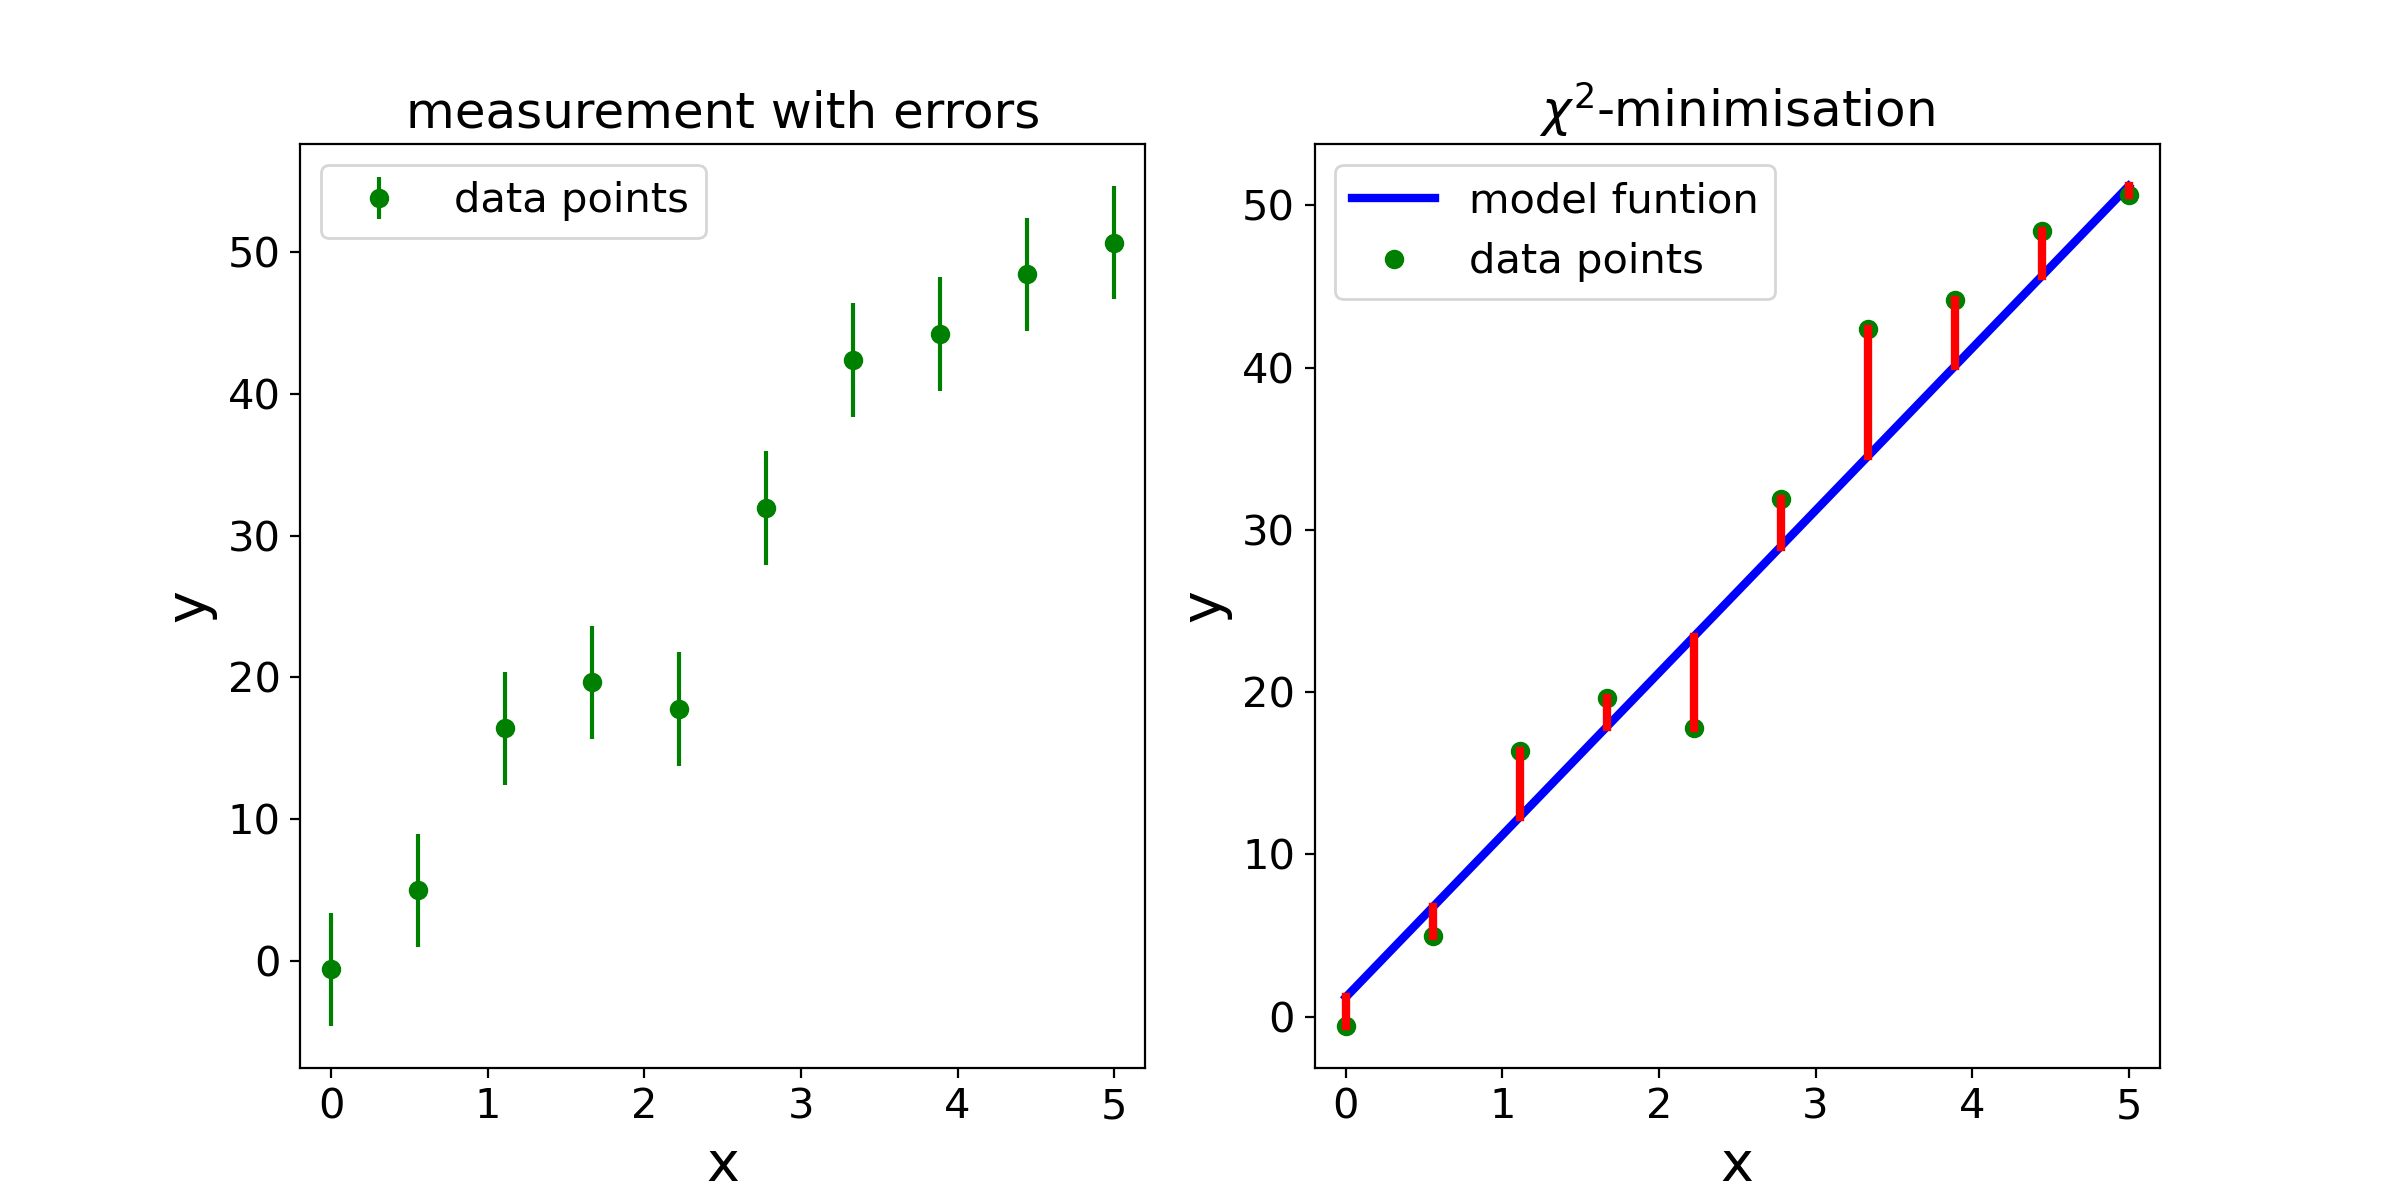
</div>

### Εφαρμογή: Μέθοδος ελάχιστων τετραγώνων για γραμμική παλινδρόμηση

#### Εύρεση βέλτιστων παραμέτρων χρησιμοποιώντας λύσεις κλειστής-μορφής

Έστω ότι μας δίνεται ένα σύνολο δεδομένων, $\{x_i, y_i\}$ με $i=1,\dots,n$, όπου $n$ το σύνολο των σημείων που περιέχει και το οποίο παρουσιάζει μία γραμμική συμπεριφορά (π.χ. δες σχήμα παραπάνω). Ο σκοπός μας είναι να φτιάξουμε ένα μοντέλο απλής γραμμικής παλινδρόμησης 

$$f(x, \beta) \equiv f(x, m, b) = y = mx + b,\quad\beta = (m, b)$$ 

το οποίο θα περιγράφει τα εν λόγω δεδομένα σχετίζοντας τα σημεία $x_i$ με τα σημεία $y_i$.

Για να βρούμε την ευθεία που "ταιριάζει" καλύτερα για το πλήθος των σημείων $\{x_i, y_i\}$ σημαίνει ότι πρέπει να βρούμε ποιές είναι οι βέλτιστες τιμές των παραμέτρων $\beta$, δηλαδή της κλίσης $m$ και του σταθερού όρου $b$, για το συγκεκριμένο σύνολο δεδομένων.

Προκειμένου να το επιτύχουμε αυτό, μπορούμε να ορίσουμε μία συνάρτηση σφάλματος (a.k.a. cost function):

$$J(\beta) = \sum_{i=1}^n \epsilon_i^2 =  \sum_{i=1}^{n} (y_i - m x_i - b)^2,\quad\beta = (m, b)$$

και να βρούμε για ποιές τιμές των παραμέτρων $\beta$ αυτή η συνάρτηση ελαχιστοποιείται, όπου $\epsilon_i$ είναι το σφάλμα ή κατάλοιπο (residual). Όπως, είπαμε αυτή η τεχνική ονομάζεται μέθοδος των ελαχίστων τετραγώνων, καθώς προσπαθούμε να ελαχιστοποιήσουμε το τετράγωνο της διαφοράς $\epsilon = y - f(x,\beta)$, όπου $y$ είναι οι παρατηρήσεις μας και $f(x, \beta)$ η πρόβλεψη του μοντέλου μας που αντιστοιχεί σε αυτή την παρατήρηση.

Μπορεί να δειχθεί αναλυτικά ότι οι τιμές $m$ και $b$ που ελαχιστοποιούν την συνάρτηση σφάλματος $J(\beta)$ δίνονται από τις σχέσεις:

\begin{align}
    m &= \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum(x^2) - \left(\sum x_i\right)^2} \\\\
    b &= \frac{\sum y_i - m \sum x_i}{n}
\end{align}

Αυτή η προσέγγιση ονομάζεται, συνήθως, ως λύση "κλειστής-μορφής" και δεν περιλαμβάνει κάποια επαναληπτική διαδικασία βελτιστοποίησης, όπως η κάθοδος κλίσης, που θα δούμε στη συνέχεια.

Παρακάτω θα δούμε στην πράξη τα όσα συζητήσαμε μέχρι στιγμής:

1. παράγοντας κάποια τυχαία δεδομένα με θόρυβο που δείχνουν μία γραμμική συμπεριφορά

2. κατασκευάζοντας μία συνάρτηση που υπολογίζει τις βέλτιστες τιμές των παραμέτρων $m$ και $b$ για ένα απλό μοντέλο γραμμικής παλινδρόμησης.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Generate some data and and some noise that follows a Gaussian distribution
np.random.seed(42)

x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.normal(0, 1, len(x))

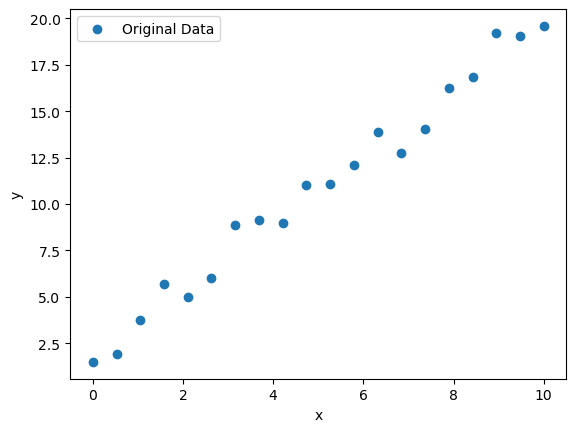

In [3]:
# Visualize the data set
plt.scatter(x, y, label='Original Data')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [4]:
def linear_regression_model(x, slope, intercept):
    """
    Calculate the predicted values of a linear regression model.

    Parameters:
    ===========
        - x (numpy.ndarray) : The independent variable values.
        - slope (float)     : The slope (coefficients) of the linear model.
        - intercept (float) : The intercept (bias) of the linear model.

    Returns:
    ========
        numpy.ndarray: An array of predicted values based on the linear regression model.

    Example:
    ========
        >>> x = np.array([1, 2, 3, 4, 5])
        >>> slope = 2.0
        >>> intercept = 1.0
        >>> linear_model(x, slope, intercept)
        array([ 3.,  5.,  7.,  9., 11.])

    Note:
    =====
        The linear regression model is represented as y = mx + b, where:
            - y is the dependent variable (predicted values),
            - m is the slope (coefficients),
            - x is the independent variable,
            - b is the intercept (bias).
    """
    return slope * x + intercept



def linear_regression_fit(x, y):
    """
    Calculate the parameters (slope and intercept) for a linear regression model 
    using the least squares method.

    Parameters:
    ===========
        - x (numpy.ndarray) : The independent variable values.
        - y (numpy.ndarray) : The dependent variable values.

    Returns:
    ========
        tuple : A tuple containing the calculated parameters (slope, intercept) for the 
        linear regression model.

    Example:
    ========
        >>> x = np.array([1, 2, 3, 4, 5])
        >>> y = np.array([2, 4, 5, 4, 5])
        >>> linear_regression_fit(x, y)
        (0.4, 2.2)

    Note:
    =====
        The linear regression model is represented as y = mx + b, where:
            - m is the slope (calculated parameter),
            - b is the intercept (calculated parameter).

        The function uses closed-form solutions derived from the least squares method to 
        find the optimal parameters.
    """
    
    N = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x**2)
    b = (sum_y - m * sum_x) / N

    return m, b

In [5]:
# Calculate linear regression parameters for our dataset
m_fit, b_fit = linear_regression_fit(x, y)

print(f'Fitted Line: y = {m_fit:.2f}x + {b_fit:.2f}')

Fitted Line: y = 1.81x + 1.77


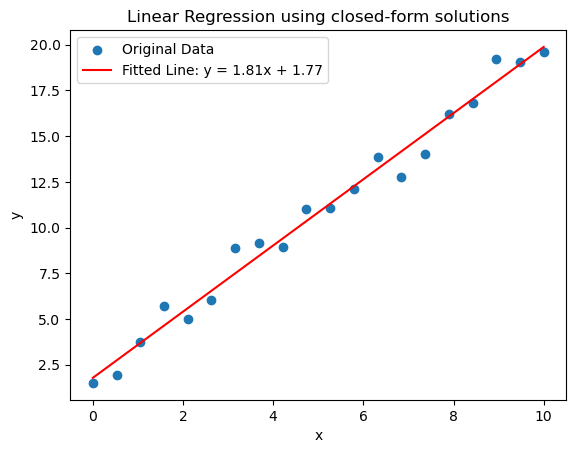

In [6]:
# Generate points for the fitted line
x_fitted = np.linspace(0, 10, 100)
y_fitted = linear_regression_model(x_fitted, m_fit, b_fit)

# Plot the original data and the fitted line
plt.scatter(x, y, label='Original Data')
plt.plot(x_fitted, 
         y_fitted, 
         color='red', 
         label=f'Fitted Line: y = {m_fit:.2f}x + {b_fit:.2f}'
        )

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using closed-form solutions')

plt.show()

Για απλά μοντέλα όπως η γραμμική παλινδρόμηση, οι λύσεις κλειστής-μορφής παρέχουν μια αναλυτική έκφραση για τις βέλτιστες παραμέτρους και μπορούν να είναι υπολογιστικά αποδοτικές καθώς υπολογίζουν απευθείας τη λύση με βάση αυτούς τους μαθηματικούς τύπους.

Όμως οι λύσεις κλειστής-μορφής μπορεί να καταστούν μη-πρακτικές ή ακόμα και ανύπαρκτες για πιο πολύπλοκα μοντέλα, όπως αυτά που περιλαμβάνουν μη-γραμμικότητες ή αλληλεπιδράσεις μεταξύ μεταβλητών.

Σε αυτές τις περιπτώσεις, κάποια επαναληπτική μέθοδος βελτιστοποίησης όπως η **κάθοδος κλίσης** (gradient descent) ή ο αλγόριθμος Levenberg-Marquardt αποδεικνύονται εξαιρετικά χρήσιμες ή ακόμα και αναγκαίες. Αυτές οι μέθοδοι είναι πιο γενικές και μπορούν να χειριστούν ένα ευρύτερο φάσμα προβλημάτων βελτιστοποίησης καθώς λειτουργούν περιορίζοντας επαναληπτικά τις εκτιμήσεις των παραμέτρων προσαρμόζοντάς τις προς την κατεύθυνση που ελαχιστοποιεί την συνάρτηση σφάλματος.

Παρακάτω θα δούμε πως εφαρμόζεται η κάθοδος κλίσης στα πλαίσια της γραμμικής παλινδρόμησης. Με άλλα λόγια, θα δούμε πως μπορούμε να χρησιμοποιήσουμε μία επαναληπτική διαδικασία βελτιστοποίησης όπως η κάθοδος κλίσης για να προσδιορίσουμε τις βέλτιστες τιμές των παραμέτρων $\beta$ του παραπάνω προβλήματος, χωρίς την χρήση των λύσεων κλειστής-μορφής. Πριν προχωρήσουμε, όμως, στην δική μας υλοποίηση μιας τέτοιας επαναληπτικής μεθόδου, ας δούμε κάποια βασικά κομμάτια της θεωρίας και της λογικής πίσω από αυτήν.

#### Εύρεση βέλτιστων παραμέτρων χρησιμοποιώντας κάθοδο κλίσης

Στο πλαίσιο των γραμμικών ελαχίστων τετραγώνων, η κάθοδος κλίσης είναι ένας επαναληπτικός αλγόριθμος βελτιστοποίησης που χρησιμοποιείται για την εύρεση των βέλτιστων παραμέτρων (συντελεστών) για ένα γραμμικό μοντέλο που ελαχιστοποιεί το άθροισμα των τετραγωνικών διαφορών μεταξύ των παρατηρούμενων και των προβλεπόμενων τιμών. Ο στόχος της καθόδου κλίσης είναι η προσαρμογή των παραμέτρων προς την κατεύθυνση που οδηγεί σε μείωση της συνάρτησης σφάλματος, η οποία, σε αυτήν την περίπτωση, είναι το άθροισμα των τετραγωνικών καταλοίπων.

<!-- 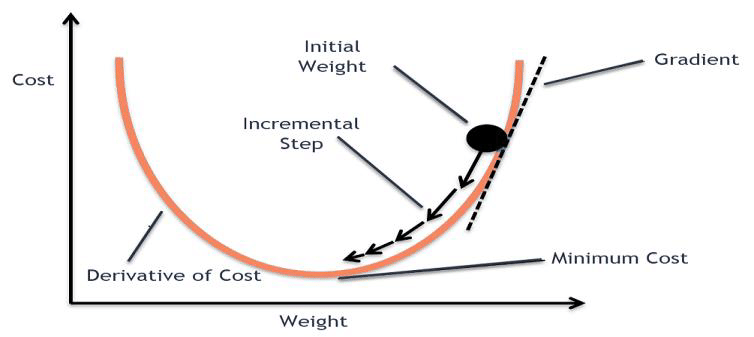 -->
<div>
    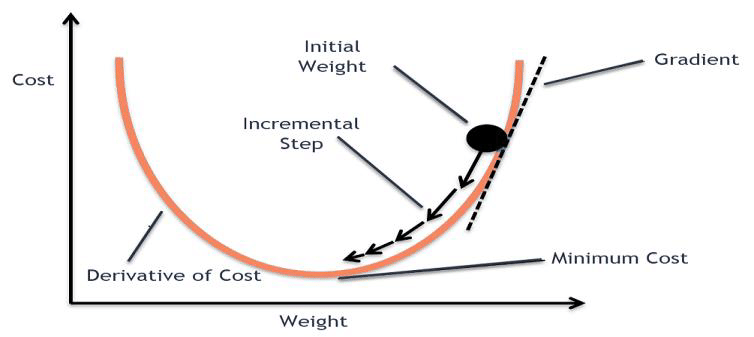
</div>

**Συνάρτηση κόστους**

Στην γραμμική παλινδρόμηση, η συνάρτηση κόστους (σφάλματος) είναι το άθροισμα των τετραγωνικών διαφορών μεταξύ των παρατηρούμενων ($y_i$) και προβλεπόμενων από το μοντέλο ($y_{i,{\text{pred}}}$) τιμών:

$$ J(\theta) = \frac{1}{2N} \sum_{i=1}^{N} (y_i - y_{i,{\text{pred}}})^2 $$

όπου με $\theta$ αναπαριστούμε τις παραμέτρους του γραμμικού μοντέλου. Υιοθετούμε έναν ελαφρώς διαφορετικό φορμαλισμό για να δείξουμε πως η όλη διαδικασία γενικεύεται πλέον σε περισσότερες διαστάσεις.

#### Κανόνας ενημέρωσης παραμέτρων

Προκειμένου να κατευθυνθούμε προς το ελάχιστο της συνάρτησης κόστους, αρχικά υπολογίζεται η κλίση της συνάρτησης κόστους ως προς τις παραμέτρους ($\theta$) και στη συνέχεια οι παράμετροι ενημερώνονται επαναληπτικά μέσω κάποιου βρόγχου επανάληψης.

$$ \theta_{\text{new}} = \theta_{\text{old}} - \alpha \nabla J(\theta_{\text{old}}) $$

όπου:
- $\alpha$ είναι ο ρυθμός εκμάθησης (learning rate), μία θετική σταθερά που καθορίζει το βήμα της αναζήτσης στον χώρο των παραμέτρων.

- $\nabla J(\theta_{\text{old}})$ είναι το διάνυσμα κλίσης της συνάρτησης σφάλματος ως προς τις παραμέτρους.

<!-- 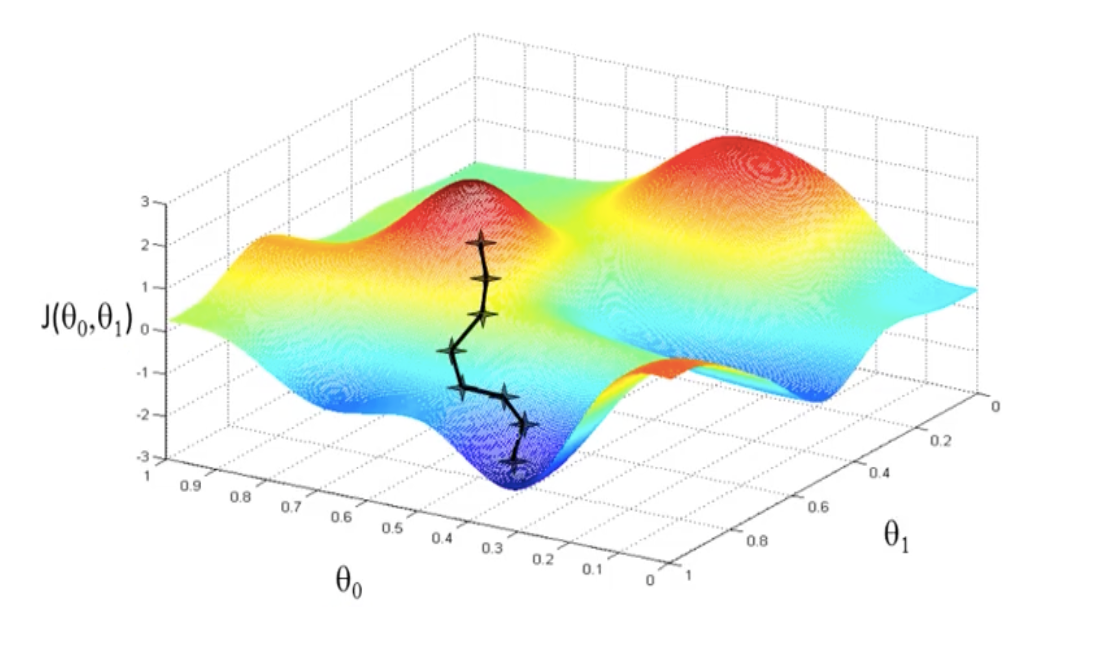 -->
<div>
    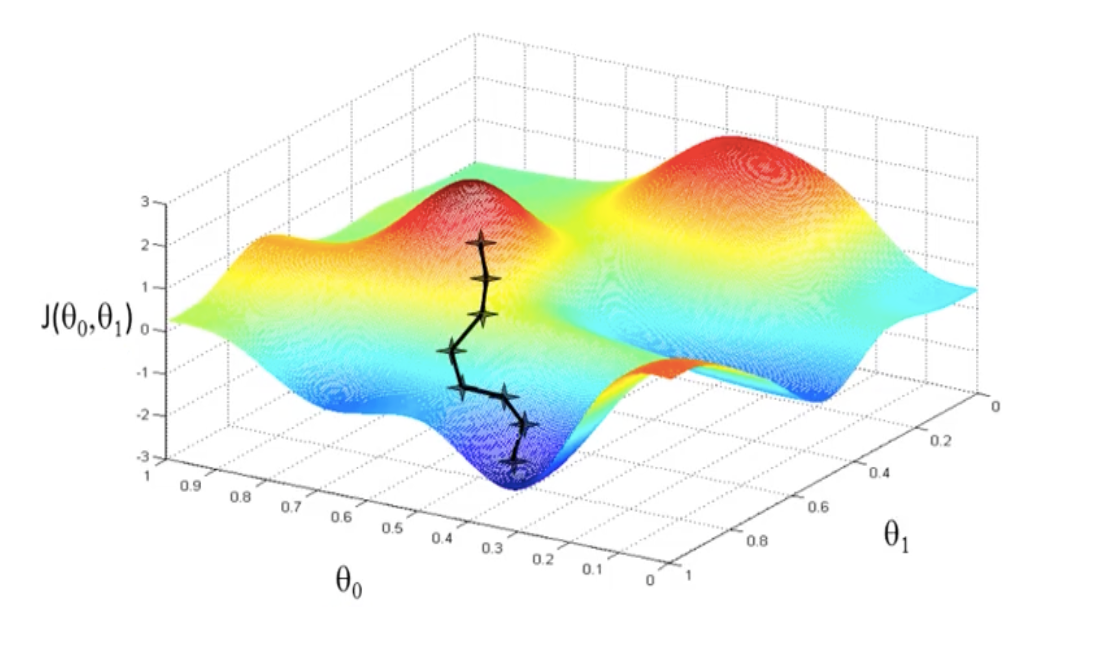
</div>

#### Υπολογισμός κλίσης στη γραμμική παλινδρόμηση

Για την περίπτωση της γραμμικής παλινδρόμησης, η κλίση ως προς την κάθε μία παράμετρο, $ \theta = (m, b)$ για την εξίσωση $ y = mx + b $, υπολογίζεται ως εξής:

\begin{align}
    \frac{\partial J}{\partial b} &= -\frac{1}{N} \sum_{i=1}^{N} (y_i - y_{i,{\text{pred}}}) \\\\
    \frac{\partial J}{\partial m} &= -\frac{1}{N} \sum_{i=1}^{N} x_i (y_i - y_{i,{\text{pred}}})
\end{align}

#### Επαναληπτική ενημέρωση παραμέτρων

Οι παράμετροι $b$ and $m$ ενημερώνονται επαναληπτικά χρησιμοποιώντας τον υπολογισμό της κλίσης που περιγράφουμε πιο πάνω, μέχρις ότου υπάρξει σύγκλιση (convergence) σε κάποιες τιμές. 

#### Σύγκλιση

Η σύγκλιση σε κάποιες τιμές τυπικά προσδιορίζεται παρακολουθώντας την αλλαγή στη συνάρτηση κόστους ή στις παραμέτρους. Η διαδικασία σταματά όταν η αλλαγή γίνει αρκετά μικρή ή μετά από έναν προκαθορισμένο αριθμό επαναλήψεων.

>Συνοπτικά, η κάθοδος κλίσης είναι μια μέθοδος για την επαναληπτική βελτίωση των παραμέτρων ενός μαθηματικού μοντέλου (εδώ γραμμικής παλινδρόμησης) προσαρμόζοντάς τες προς την κατεύθυνση που μειώνει το άθροισμα των τετραγωνικών διαφορών μεταξύ των παρατηρούμενων και των προβλεπόμενων τιμών. Ο ρυθμός εκμάθησης ελέγχει το μέγεθος του βήματος στη διαδικασία βελτιστοποίησης και ο αλγόριθμος συνεχίζει μέχρι να επιτευχθεί σύγκλιση.


Έχοντας κατανοήσει την απαραίτητη θεωρία σχετικά με την κάθοδο κλίσης, ας δούμε πως εφαρμόζεται στην πράξη:

In [7]:
def gradient_descent(x, y, learning_rate=0.01, max_iter=10_000):
    """
    Perform gradient descent optimization to find the optimal parameters 
    for a linear regression model.

    Parameters:
    ===========
        - x (numpy.ndarray)               : The independent variable values.
        - y (numpy.ndarray)               : The dependent variable values.
        - learning_rate (float, optional) : The step size or learning rate for 
                                            gradient descent (default is 0.01).
        - max_iter (int, optional)        : The number of iterations (or epochs) for the 
                                            optimization process (default is 10000).

    Returns:
    ========
        tuple : A tuple containing the optimized parameters (slope, intercept) 
        for the linear regression model.

    Example:
    ========
        >>> x = np.array([1, 2, 3, 4, 5])
        >>> y = 2 * x + 1 + np.random.normal(0, 1, len(x))
        >>> gradient_descent(x, y)
        (2.0, 1.0)

    Note:
    =====
        The linear regression model is represented as y = mx + b, where:
            - y is the dependent variable,
            - m is the slope (calculated parameter),
            - x is the independent variable,
            - b is the intercept (calculated parameter).

        The function uses the gradient descent algorithm to iteratively 
        adjust parameters for optimal model fitting.
    """
    # Initialize parameters
    slope, intercept = 0, 0
    n = len(x)

    # Gradient descent optimization
    for _ in range(max_iter):
        y_pred = linear_regression_model(x, slope, intercept)
        gradient_slope = (-1/n) * np.sum(x * (y - y_pred))
        gradient_intercept = (-1/n) * np.sum(y - y_pred)

        slope -= learning_rate * gradient_slope
        intercept -= learning_rate * gradient_intercept

    return slope, intercept

In [8]:
# Perform gradient descent to find optimal parameters
slope_fit, intercept_fit = gradient_descent(x, y)

print(f'Optimal parameters: m = {slope_fit:.2f}, b = {intercept_fit:.2f}')

Optimal parameters: m = 1.81, b = 1.77


Παρατηρούμε ότι πήραμε ακριβώς τις ίδιες βέλτιστες τιμές για τις παραμέτρους $m$ και $b$ με αυτές που προέκυψαν από τις λύσεις κλειστής-μορφής.

> **Σημείωση**: Δοκιμάστε να αλλάξετε την τιμή της παραμέτρου ``max_iter`` στην συνάρτηση ``gradient_descent``. Τι αλλάζει στο αποτέλεσμα αν την μειώσετε/αυξήσετε;

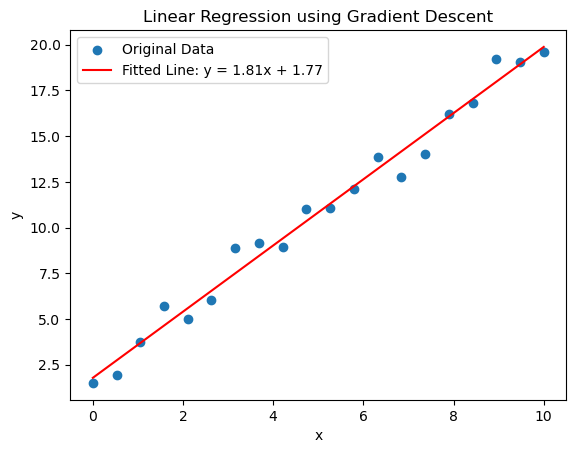

In [9]:
# Plot the original data and the fitted line
plt.scatter(x, y, label='Original Data')
plt.plot(x, 
         linear_regression_model(x, slope_fit, intercept_fit), 
         color='red', 
         label=f'Fitted Line: y = {slope_fit:.2f}x + {intercept_fit:.2f}'
        )

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using Gradient Descent')

plt.show()

Είδαμε το πιο απλό παράδειγμα προσαρμογής ενός μαθηματικού μοντέλου: αυτό της γραμμικής παλινδρόμησης. Γίνεται όμως αντιληπτό, ότι μπορούμε να εφαρμόσούμε τους δικούς μας αλγόριθμους προσαρμογής οποιασδήποτε καμπύλης χρησιμοποιώντας βασικές μαθηματικές αρχές και τεχνικές βελτιστοποίησης.

Για καλή μας τύχη υπάρχουν βιβλιοθήκες που υλοποιούν πολλές τέτοιες τεχνικές και μας δίνουν έτοιμη την λειτουργικότητα που χρειαζόμαστε. Από τις πιο σημαντικές βιβλιοθήκες στην Python γι' αυτό τον σκοπό είναι η βιβλιοθήκη ``SciPy``.

## Προσαρμογή καμπύλης στα δεδομένα με την βιβλιοθήκη ``SciPy``

Στα παραδείγματα που ακολουθούν, θα παρουσιάσουμε την πιο απλή μέθοδο που προσφέρει η βιβλιοθήκη ``Scipy`` για την προσαρμογή κάποιας καμπύλης στα δεδομένα μας, την συνάρτηση ``curve_fit``. 

Η συνάρτηση ``curve_fit`` χρησιμοποιεί την μέθοδο των μη-γραμμικών ελαχίστων τετραγώνων, καθώς και τον αλγόριθμο Levenberg-Marquardt, για την εύρεση των βέλτιστων τιμών των παραμέτρων προσαρμογής. 

Για αναλυτικές πληροφορίες σχετικά με το πως η εν λόγω συνάρτηση χρησιμοποιεί την τεχνική των ελαχίστων τετραγώνων για την προσαρμογή, μπορείτε να βρείτε [εδώ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit).

In [10]:
import scipy.optimize as so

/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
# Let's look at some sample data
x_data = np.array([0., 0.15789474, 0.31578947, 0.47368421, 0.63157895,
       0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263,
       1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632,
       2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.])

y_data = np.array([2.95258285,   2.49719803,  -2.1984975 ,  -4.88744346,
        -7.41326345,  -8.44574157, -10.01878504, -13.83743553,
       -12.91548145, -15.41149046, -14.93516299, -13.42514157,
       -14.12110495, -17.6412464 , -16.1275509 , -16.11533771,
       -15.66076021, -13.48938865, -11.33918701, -11.70467566])

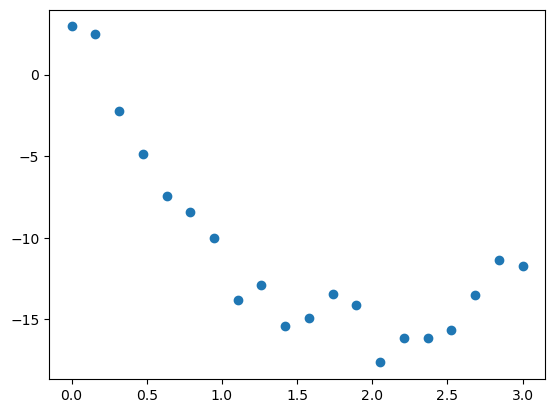

In [12]:
_ = plt.scatter(x_data,y_data)

Η μορφή της κατανομής των δεδομένων μας θυμίζει αρκετά ένα πολυώνυμο δευτέρου βαθμού. Είναι λογικό, λοιπόν, να θεωρήσουμε ότι ένα πολυώνυμο της μορφής

$$f(x, \beta) = f(x,a,b,c) = a(x-b)^2 + c$$

όπου $\beta = (a,b,c)$, αποτελεί ένα ικανοποιητικό θεωρητικό μοντέλο που μπορεί να περιγράψει την κατανομή των δεδομένων μας. Αυτό που πρέπει να προσδιορίσουμε τώρα είναι για **ποιές τιμές των $a$, $b$ και $c$** το παραπάνω θεωρητικό μοντέλο έχει την καλύτερη δυνατή συμπεριφορά που ταιριάζει στα δεδομένα μας.

Αυτό προϋποθέτει δύο βήματα:

1. Να ορίσουμε τη συνάρτηση του θεωρητικού μοντέλου.

2. Να χρησιμοποιήσουμε τη συνάρτηση ``curve_fit`` που παρέχεται από τη βιβλιοθήκη ``scipy.optimize``. Αυτή η συνάρτηση απαιτεί να δώσουμε κάποιες αρχικές τιμές για τις παραμέτρους $\beta$, κάτι που πρέπει να γίνει με προσοχή όταν έχουμε πολύπλοκα μοντέλα, αλλιώς η συνάρτηση μπορεί να μην δώσει αξιόπιστα αποτελέσματα.


<!-- <div style="background-color:rgba(239, 45, 45, 0.2)"> -->
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<br>
    <b>ΠΡΟΣΟΧΗ</b>: Μην χρησιμοποιείτε την μέθοδο <mark>curve_fit</mark> όταν έχετε σφάλματα και στις δύο μεταβλητές! Σε αυτή την περίπτωση θα πρέπει να καταφύγετε στην χρήση άλλων μεθόδων (π.χ. <a href="https://docs.scipy.org/doc/scipy/reference/odr.html">Orthogonal distance regression</a>).
<br><br>
</div>

In [13]:
# Define the function that describes the 
# theoretical model
def polynomial_model(x, a, b, c):
    """A second order polynomial function"""
    return a*(x-b)**2 + c

In [14]:
# Fit the theoretical curve on our data
popt, pcov = so.curve_fit(polynomial_model, x_data, y_data)

Η συνάρτηση ``curve_fit`` επιστρέφει δύο πίνακες:

1. τον πίνακα ``popt``, που περιέχει τις βέλτιστες τιμές για τις παραμέτρους $\beta$ του μοντέλου ``polynomial_model``, για τα συγκεκριμένα σύνολα δεδομένων ``x_data`` και ``y_data``.

In [15]:
popt

array([  4.92207992,   2.00492121, -16.04690266])

In [16]:
print("a = %f" % (popt[0]))
print("b = %f" % (popt[1]))
print("c = %f" % (popt[2]))

a = 4.922080
b = 2.004921
c = -16.046903


In [17]:
print("a = {} \nb = {} \nc = {}".format(*popt))

a = 4.922079922602843 
b = 2.004921210691221 
c = -16.04690266030743


2. τον πίνακα ``pcov``. Αυτός ο πίνακας ονομάζεται **πίνακας συνδιακύμανσης** (covariance matrix) και μας δίνει μία εκτίμηση για το σφάλμα των παραμέτρων που περιέχει ο πίνακας ``popt`` (δηλαδή των παραμέτρων $\beta = (a,b,c)$ και πόσο καλή είναι η προσαρμογή της θεωρητικής καμπύλης στα δεδομένα μας). Το "σφάλμα" σε κάθε μία από τις παραμέτρους του μοντέλου μας συνδέεται με το πόσο ευαίσθητο είναι το μοντέλο μας σε αλλαγές αυτής της παραμέτρου. Επίσης, μας δίνει πληροφορίες σχετικά με τον ποιό τρόπο εξαρτώνται οι παράμετροι της προσαρμογής $\beta$ μεταξύ τους.

In [18]:
pcov

array([[ 0.12827821, -0.01315915, -0.07363194],
       [-0.01315915,  0.00222114,  0.00322289],
       [-0.07363194,  0.00322289,  0.13377697]])

Παρατηρήστε ότι ο πίνακας συνδιακύμανσης είναι δισδιάστατος: **τα διαγώνια στοιχεία του πίνακα αφορούν το σφάλμα (διακύμανση-variance) για κάθε μία από τις παραμέτρους προσαρμογής** και τα μη-διαγώνια στοιχεία αφορούν τη σχέση μεταξύ των παραμέτρων. 

Η τετραγωνική ρίζα της διακύμανσης θα μας δώσει τα αντίστοιχα $1\sigma$-σφάλματα.

In [19]:
p_sigma = np.sqrt(np.diag(pcov))
p_sigma

array([0.35815948, 0.04712895, 0.36575534])

In [20]:
print("a = %f +/- %f" % (popt[0], p_sigma[0]))
print("b = %f +/- %f" % (popt[1], p_sigma[1]))
print("c = %f +/- %f" % (popt[2], p_sigma[2]))

a = 4.922080 +/- 0.358159
b = 2.004921 +/- 0.047129
c = -16.046903 +/- 0.365755


Έχοντας αποκτήσει τις βέλτιστες τιμές για τις παραμέτρους προσαρμογής, μπορούμε να φτιάξουμε ένα διάγραμμα όπου θα φαίνονται τα πειραματικά μας δεδομένα και η καμπύλη προσαρμογής. Αυτό θα μας βοηθήσει να δούμε το πόσο καλά το θεωρητικό μοντέλο που επιλέξαμε περιγράφει τα δεδομένα που έχουμε.

Για να κατασκευάσουμε την καμπύλη προσαρμογής, πρέπει να φτιάξουμε ένα διάστημα τιμών για τον $x$-άξονα. Εφόσον θέλουμε να έχουμε τοσο την καμπύλη προσαρμογής όσο και τα δεδομένα στο ίδιο γράφημα, πρέπει αυτό το διάστημα τιμών να έχει το ίδιο εύρος με αυτό των δεδομένων.

In [21]:
# Unpack the fitting parameters
a_opt, b_opt, c_opt = popt

# Create the x-axis intervals
x_model = np.linspace(min(x_data), max(x_data), 100)

# and the y-values from the theoretical model
# that correspond to this interval
y_model = polynomial_model(x_model, a_opt, b_opt, c_opt)

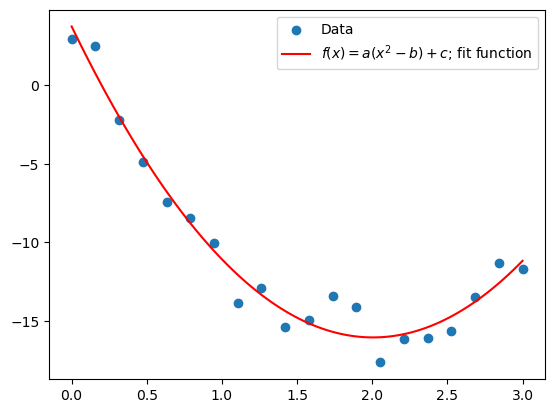

In [22]:
# Plot the dataset
_ = plt.scatter(x_data, y_data, label='Data')

# Overplot the fit function
_ = plt.plot(x_model, y_model, color='r', label=r'$f(x) = a(x^2 - b) + c$; fit function')

_ = plt.legend(loc='upper right')

---
<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Παράδειγμα 2.1</b>

Στο παρακάτω κελί δημιουργούμε κάποια ψεύτικα δεδομένα με σφάλματα. Κάντε ένα γράφημα των δεδομένων μαζί με τα σφάλματά τους και προσαρμόστε ένα κατάλληλο μαθηματικό μοντέλο που να περιγράφει τα δεδομένα. Ποιές είναι οι βέλτιστες τιμές των παραμέτρων του μοντέλου που επιλέξατε;

In [23]:
# create some mock data
numpoints = 10 # the number of points we want to simulate

x = np.random.uniform(0., 100., numpoints)

# The error on each point comes from a normal distribution
# with sigma = 10
y = 2. * x + 2.6 + np.random.normal(0., 10., numpoints)

In [24]:
# You can try it here

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για την λύση</summary></b>
    
```python 
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so
    
def fit_line(x, a, b):
    return a * x + b

# perform the fit
# Please read carefully the documentation to see how errors
# are handled. In Physics we typically give absolute errors,
# not relative ones!
popt, pcov = so.curve_fit(fit_line, x, y, sigma = np.ones(y.shape) * 10, absolute_sigma=True)

print(popt)
print(pcov)
print(f"a = {popt[0]} +/- {np.sqrt(pcov[0][0])}")
print(f"b = {popt[1]} +/- {np.sqrt(pcov[1][1])}")

x_fit = np.linspace(0.0, 100, 100)
y_fit = fit_line(x_fit, *(popt)
                )
_ = plt.errorbar(x, y, yerr=10, fmt=".")
_ = plt.plot(x_fit, y_fit, 'r-')
```
 
</details>

---

Έχοντας το θεωρητικό μοντέλο που περιγράφει τα δεδομένα μας καθώς και το $1\sigma$-σφάλμα αυτών των παραμέτρων, μπορούμε να συμπεριλάβουμε και το **διάστημα εμπιστοσύνης** (confidence levels) της καμπύλης προσαρμογής. Ας υποθέσουμε ότι θέλουμε να κατασκευάσουμε το διάστημα εμπιστοσύνσης που αντιστοιχεί σε δύο τυπικές αποκλίσεις από τη μέση τιμή ($2\sigma$ confidence levels).

Σε αυτή την περίπτωση το άνω/κάτω όριο θα απέχει από τη μέση τιμή δύο φορές την τυπική απόκλιση που πήραμε από τον πίνακα συνδιακύμανσης. Έχοντας τα πάνω και κάτω όρια, μπορούμε απλά να γραμμοσκιάσουμε την περιοχή μεταξύ αυτών των τιμών.

In [25]:
nstd = 2. # number of standard deviations

popt_up = popt + nstd * p_sigma # the upper limit (+2sigma)
popt_low = popt - nstd * p_sigma # the lower limit (-2sigma)

# The x-y values for the 5-sigma upper/lower curves
y_fit_up = polynomial_model(x_model, *popt_up)
y_fit_low = polynomial_model(x_model, *popt_low)

In [26]:
# define the style we are going to use for our plots.

# The "science" matplotlib style is available via the scienceplot module
# If it's not already installed the following line of code will cause an exception
# You can install it by following this link: https://pypi.org/project/SciencePlots/
plt.style.use(["default", "science", "notebook"])

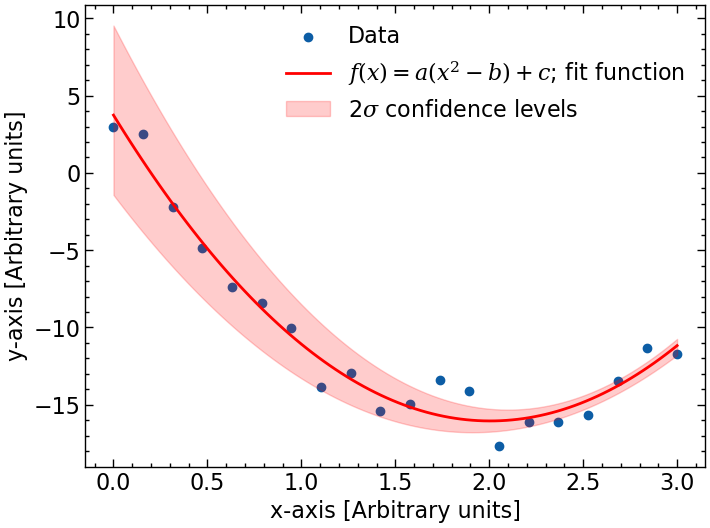

In [27]:
plt.xlabel('x-axis [Arbitrary units]')
plt.ylabel('y-axis [Arbitrary units]')

# Plot the dataset
_ = plt.scatter(x_data, y_data, label='Data')

# Overplot the fit function
_ = plt.plot(x_model, y_model, color='r', label=r'$f(x) = a(x^2 - b) + c$; fit function')

# Overplot the confidence levels
_ = plt.fill_between(x_model, y_fit_up, y_fit_low, alpha=0.2, color='r', label=r'2$\sigma$ confidence levels')

_ = plt.legend(loc='upper right')

Έτσι, καταλήγουμε στο συμπέρασμα ότι η αναλυτική σχέση (θεωρητικό μοντέλο) που περιγράφει το σύνολο των δεδομένων μας είναι η:

$$f(x) = 4.92 \pm 0.35 \left(x - 2.00 \pm 0.04 \right)^2 - 16.04 \pm 0.36$$

Χρησιμοποιώντας αυτό το θεωρητικό μοντέλο, μπορούμε τώρα να κάνουμε προβλέψεις για τιμές που δεν ανήκουν στο αρχικό σύνολο δεδομένων. Για παράδειγμα, για $x=0.2$ (τιμή που δεν αποτελεί μέρος των μετρήσεών μας) περιμένουμε σύμφωνα με το μοντέλο μας ότι $y= - 0.099$.

## Παραδείγματα

### Παράδειγμα 1: Φασματοσκοπία-γ και προσαρμογή Γκαουσιανής κατανομής

Σκοπός μας στην φασματοσκοπία-γ είναι η καταμέτρηση της έντασης της ακτινοβολίας που εκπέμπεται από μία πηγή ακτίνων γάμμα σαν συνάρτηση της ενέργειας των φωτονίων.

Σε αυτό το παράδειγμα θα δουλέψουμε με ένα σύνολο δεδομένων που περιέχει το φάσμα ακτίνων-γ μίας μονοενεργειακής πηγής ακτίνων-γ που λήφθηκε με κάποιον ανιχνευτή, συγκεκριμένα του ραδιοϊσοτόπου Καίσιο-137 (Cesium-137; Cs-137). 

Η πρώτη στήλη περιέχει τον αριθμό των καναλιών. Κάθε κανάλι αντιστοιχεί σε κάποιο συχνοτικό εύρος, άρα αυτή η στήλη ουσιαστικά εκφράζει την **ενέργεια** των φωτονίων.

Η δεύτερη στήλη περιέχει τον **αριθμό των γεγονότων** που κατέγραψε ο ανιχνευτής για κάθε ένα από αυτά τα κανάλια. Τις άλλες στήλες μπορείτε να τις αγνοήσετε.

In [28]:
import pandas as pd

In [29]:
cs_spectrum = pd.read_csv('data/cs137_spectrum.txt', delimiter='\t')
cs_spectrum.tail(5)

,Channel,Cs137,A,B,C
2043,2043,0,2,0,41
2044,2044,0,5,0,46
2045,2045,0,6,0,36
2046,2046,0,4,1,33
2047,2047,0,4,1,33


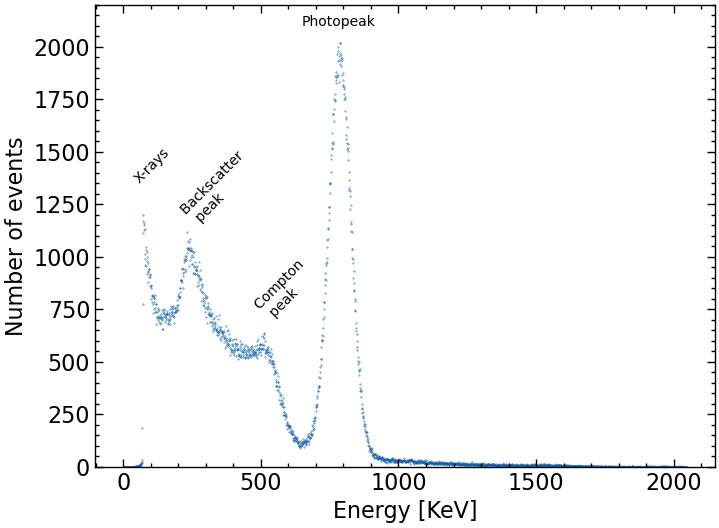

In [30]:
plt.xlabel('Energy [KeV]')
plt.ylabel('Number of events')

plt.ylim(top=2200)

_ = plt.scatter(cs_spectrum['Channel'], cs_spectrum['Cs137'], s=0.1)

_ = plt.text(32, 1350, 'X-rays', rotation=45)
_ = plt.text(200, 1150, 'Backscatter \n peak', rotation=45)
_ = plt.text(470, 700, 'Compton \n peak', rotation=45)
_ = plt.text(650, 2100, 'Photopeak')

Η μεγαλύτερη κορυφή που εμφανίζεται στο φάσμα αντιστοιχεί σε ολική απορρόφηση της ενέργειας των αρχικών ακτίνων-γ και ονομάζεται **φωτοκορυφή**. Χωρίς να μπούμε σε λεπτομέρειες που περιγράφουν την πυρηνική φυσική και τις αλληλεπιδράσεις των σωματιδίων με τον ανιχνευτή, θα αρκεστούμε στο να αναφέρουμε ότι:

- Η **μέση τιμή** της κορυφής μας δίνει πληροφορίες για την ενέργεια των φωτονίων που εκπέμφθηκαν.

- Το **πλάτος (width) της κορυφής** μας δίνει πληροφορίες για την ανάλυση (resolution) του ανιχνευτή.


Συνήθως, κορυφές αυτής της μορφής προσπαθούμε να τις προσεγγίσουμε με μία κατανομή Gauss

$$f(x, A, \mu,  \sigma) = A e^{-(x-\mu)^2/\sigma^2}$$

και να χρησιμοποιήσουμε τις παραμέτρους προσαρμογής $\mu$ και $\sigma$ για να αντλήσουμε πληροφορίες για τις ποσότητες που αναφέραμε πιο πάνω.

In [31]:
def gauss_f(x,A,mu,sig):
    """A Gaussian fit function"""
    return A*np.exp(-(x-mu)**2/sig**2)

Θελουμε να επικεντρωθούμε μόνο στη φωτοκορυφή, άρα θα φιλτράρουμε τα δεδομένα μας ώστε να περιλαμβάνουν το εύρος στο οποίο εντοπίζεται η κορυφή που θέλουμε.

In [32]:
# The x-axis data
channels = cs_spectrum.loc[:,'Channel'][(cs_spectrum['Channel'] > 725) & (cs_spectrum['Channel'] < 850)]

# The y-axis data
counts = cs_spectrum.loc[:,'Cs137'][(cs_spectrum['Channel'] > 725) & (cs_spectrum['Channel'] < 850)]

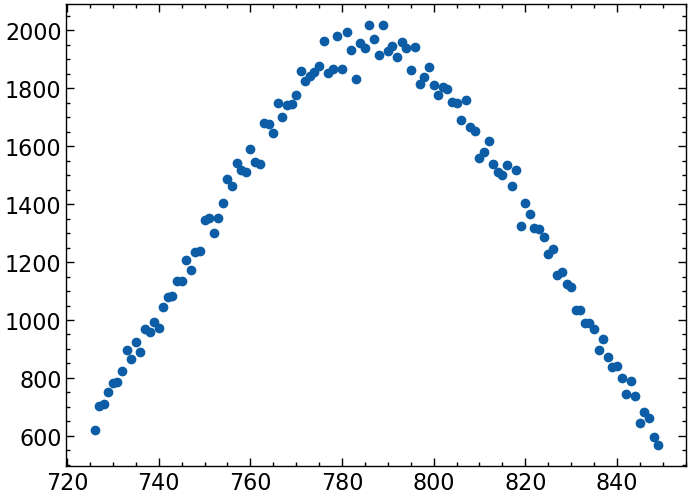

In [33]:
_ = plt.scatter(channels, counts)

Τώρα θα προσαρμόσουμε την καμπύλη Gauss στα δεδομένα μας. Σε αυτή την περίπτωση, όπως θα δούμε, πρέπει να δώσουμε εμείς κάποια αρχική εκτίμηση για τις παραμέτρους $A$, $\mu$ και $\sigma$, αλλιώς η python θα μας δώσει μία προειδοποίηση (warning) όπου θα μας ενημερώνει ότι η προσαρμογή δεν θα μπορέσει να γίνει.

Αυτό συμβαίνει γιατί η συνάρτηση ``curve_fit`` δεν μπορεί να υπολογίσει την αβεβαιότητα (διακύμανση) στις παραμέτρους προσαρμογής. Επειδή η συνάρτηση ``curve_fit`` προσπαθεί να βρει τις τιμές αυτών των παραμέτρων προσαρμογής *επαναληπτικά*, το πιο πιθανό είναι να μην μπορεί να ελαχιστοποιήσει τις παραγώγους που δίνουν το σφάλμα στην προσαρμογή σε κάθε βήμα. Έτσι, χωρίς να ξέρει αν το σφάλμα στην εκτίμηση μειώνεται ή αυξάνεται σε κάθε επανάληψη, δεν μπορεί να αποφασίσει με ποιόν τρόπο να αλλάξει τις τιμές των παραμέτρων.

Για να αποκτήσουμε μία διαίσθηση των τιμών που πρέπει να αρχικοποιήσουμε, κοιτάμε το διάγραμμα. Παρατηρούμε ότι το μέγιστο ύψος της καμπύλης είναι $A \simeq 2000$, η μέση τιμή της ενέργειας που αντιστοιχεί σε αυτό το πλάτος είναι $\mu \simeq 790$ και το πλάτος είναι $\sigma \simeq {\rm FWHM} \simeq 90$.

Μπορούμε να χρησιμοποιήσουμε τιμές κοντά σε αυτές ως αρχική εκτίμηση για τις παραμέτρους προσαρμογής.

In [34]:
A_init_guess = np.max(counts)
mu_init_guess = channels.iloc[np.argmax(counts)]

# A mask to find the indeces where counts = max/2 (half max)
FWHM_mask = np.where(np.isclose(counts, A_init_guess/2., 0.018))

# The width at half max
sigma_init_guess = np.diff(channels.iloc[FWHM_mask].values)

print("Initial guess:\n---\nA = %.0f, mu = %.0f, sigma = %.0f" % (A_init_guess, mu_init_guess, sigma_init_guess))

Initial guess:
---
A = 2018, mu = 789, sigma = 94


/var/folders/y6/62tg_s5s7536r0lp1mks4jl80000gn/T/ipykernel_52963/3840199768.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Initial guess:\n---\nA = %.0f, mu = %.0f, sigma = %.0f" % (A_init_guess, mu_init_guess, sigma_init_guess))


In [35]:
popt, pcov = so.curve_fit(gauss_f, channels, counts, p0=[2000, 790, 90])

In [36]:
popt

array([1939.55510398,  786.33851861,   57.78717217])

In [37]:
A_opt, mu_opt, sig_opt = popt
x_model = np.linspace(min(channels), max(channels), 1000)
y_model = gauss_f(x_model, A_opt, mu_opt, sig_opt)

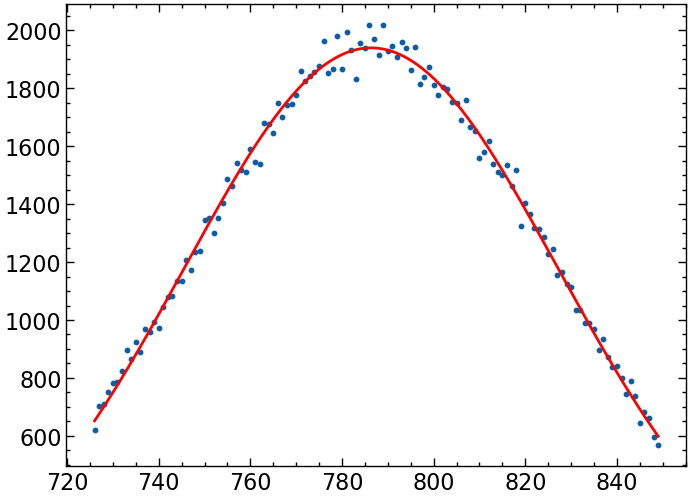

In [38]:
_ = plt.scatter(channels, counts, s=10)
_ = plt.plot(x_model, y_model, color='r', lw=2.0)

In [39]:
print("A = %f +/- %f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu = %f +/- %f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma = %f +/- %f" % (popt[2], np.sqrt(pcov[2][2])))

A = 1939.555104 +/- 5.702578
mu = 786.338519 +/- 0.144019
sigma = 57.787172 +/- 0.264272


### Παράδειγμα 2: Μετρήσεις με σφάλματα

Υποθέστε ότι οι μετρήσεις στον αριθμό των γεγονότων που χρησιμοποιήσαμε στο σύνολο δεδομένων του Παραδείγματος 1, έχουν σφάλμα που δίνεται από τη σχέση: $\delta_{y_i} = \sqrt{y_i}$, για κάθε σημείο $y_i$.

In [40]:
yerr_data = np.sqrt(counts)

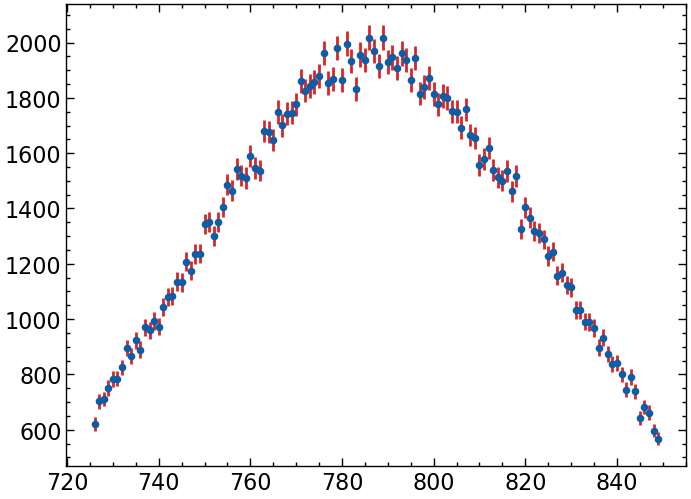

In [41]:
_ = plt.errorbar(channels, counts, yerr_data, ls='', color='tab:red')
_ = plt.scatter(channels, counts, s=20, zorder=1000)

Μπορούμε, πάλι, να εκτιμήσουμε τη μέγιστη πιθανότητα (maximum-likelihood) των τιμών των παραμέτρων προσαρμογής με τη βοήθεια της συνάρτησης ``curve_fit``.

In [42]:
popt, pcov = so.curve_fit(gauss_f, channels, counts, sigma=yerr_data, p0=[2000, 790, 90])
popt

array([1936.83040654,  786.29515452,   57.88161245])

Προσέξτε ότι τώρα η απάντηση διαφέρει ελαφρώς από αυτή του Παραδείγματος 1. Εάν όλα τα $\delta_{y_i}$ είναι τα ίδια τότε η απάντηση δεν θα διέφερε από την περίπτωση των δεδομένων χωρίς σφάλματα.

### Παράδειγμα 3: Διαμοριακές αλληλεπιδράσεις

Το δυναμικό Lennard-Jones είναι ένα δυναμικό που περιγράφει τις αλληλεπιδράσεις μεταξύ ενός ζεύγους μοριών (για περισσότερες πληροφορίες [δες εδώ](https://en.wikipedia.org/wiki/Lennard-Jones_potential)).

Το συγκεκριμένο δυναμικό δίνεται από τη σχέση:

$$V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]$$

Το ζητούμενο είναι να βρούμε τις βέλτιστες τιμές για τα $\sigma$ και $\epsilon$ ώστε το δυναμικό να περιγράφει το καλύτερο δυνατόν τα δεδομένα μας.

In [43]:
r_data, V_data = np.loadtxt('data/LJ_potential.txt')

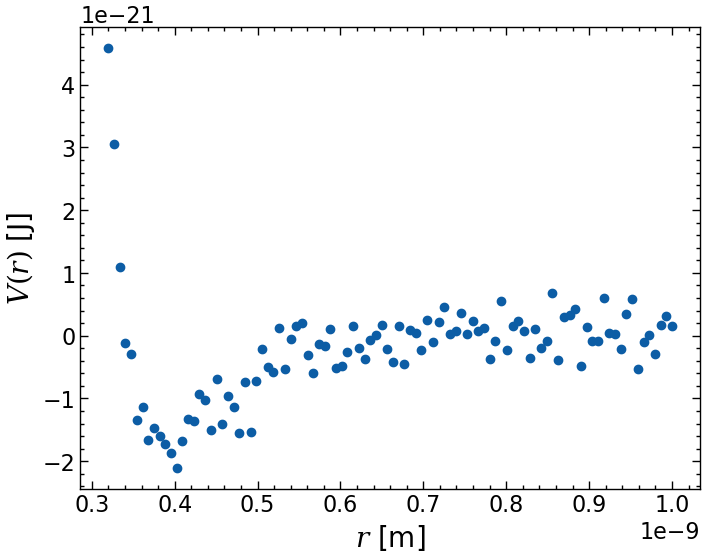

In [44]:
plt.xlabel('$r$ [m]', fontsize=20)
plt.ylabel('$V(r)$ [J]', fontsize=20)

_ = plt.scatter(r_data, V_data)

Παρατηρώντας το διάγραμμα βλεπουμε ότι οι άξονες περιγράφουν μεγάλους αριθμούς οπότε θα ήταν καλή ιδέα να επαναπροσδιορίσουμε τη κλίμακα του γραφήματος.

- Θα πολλαπλασιάσουμε τις τιμές στον $x$-άξονα με ``1e9``. Έτσι, η διάσταση του άξονα θα μετατραπεί από **μέτρα** σε **νανόμετρα**.

- Θα διαιρέσουμε τις τιμές στον $y$-άξονα με τη σταθερά του Boltzmann: $k_B = 1.3806452 \times 10^{-23}\;\;\text{J/K}$. Έτσι, η διάσταση του άξονα θα μετατραπεί από **Joules** σε **Kelvin**.

In [45]:
r_data*=1e9
V_data/=1.38e-23

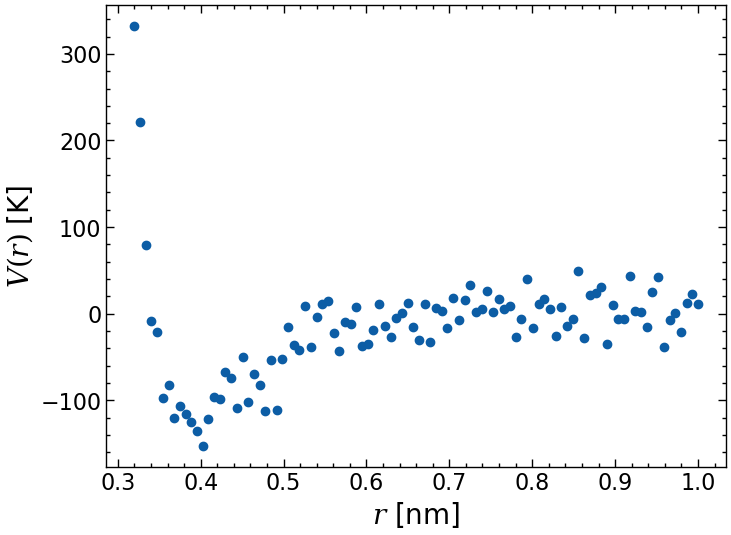

In [46]:
plt.xlabel('$r$ [nm]', fontsize=20)
plt.ylabel('$V(r)$ [K]', fontsize=20)

_ = plt.scatter(r_data, V_data)

Για να μπορέσουμε να προσαρμόσουμε την καμπύλη του δυναμικού στα δεδομένα μας, πρέπει πρώτα να εντοπίσουμε κάποια βασικά σημεία που περιγράφουν το δυναμικό. Αυτά θα μας βοηθήσουν να επιλέξουμε κατάλληλες αρχικές τιμές για τις παραμέτρους προσαρμογής.

Από τη [Wikipedia](https://en.wikipedia.org/wiki/Lennard-Jones_potential) βρίσκουμε ότι:

- Το ελάχιστο του δυναμικού είναι για $r\equiv r_{\rm min}=2^{1/6}\sigma$

- Στο ελάχιστο, η τιμή του δυναμικού είναι: $V(r_{\rm min}) = -\epsilon$

In [47]:
def LJ_potential(r, sigma, epsilon):
    """The Lennard-Jones potential"""
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)

Από το διάγραμμα βλέπουμε ότι το δυναμικό γίνεται ελάχιστο για $r_{\rm min} \simeq 0.4$ nm, ενώ η τιμή του είναι $V(r_{\rm min}) \simeq - 152$ K. Γνωρίζοντας αυτά τα δύο, μπορούμε να επιλέξουμε αρχικές τιμές για τα $\epsilon$ και $\sigma$.

In [48]:
# eps_init_guess = 120
# sig_init_guess = 2**(-1/6) * 0.4

# Initial guess for epsilon, sigma
eps_init_guess = -np.min(V_data)
sig_init_guess = 2**(-1/6) * r_data[np.argmin(V_data)]

Προσαρμόζουμε τη θεωρητική καμπύλη στα δεδομένα.

In [49]:
popt, pcov = so.curve_fit(LJ_potential, r_data, V_data, p0=[sig_init_guess, eps_init_guess])
sig_opt, eps_opt = popt

Κατασκευάζουμε ένα εύρος τιμών για τον $x$-άξονα για το θεωρητικό μοντέλο καθώς και τις αντίστοιχες τιμές του $y$-άξονα που προκύπτουν από τη θεωρητική συνάρτηση.

In [50]:
r_model = np.linspace(min(r_data), max(r_data), 1000)
V_model = LJ_potential(r_model, sig_opt, eps_opt)

Φτιάχνουμε το διάγραμμα όπου φαίνονται τα δεδομένα μας μαζί με την καμπύλη προσαρμογής

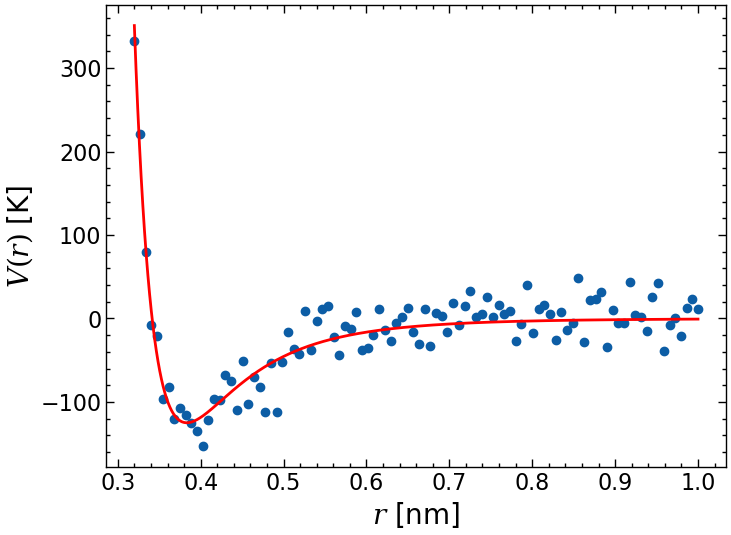

In [51]:
plt.xlabel('$r$ [nm]', fontsize=20)
plt.ylabel('$V(r)$ [K]', fontsize=20)

# Plot the data
_ = plt.scatter(r_data, V_data)

# Overplot the fitting function
_ = plt.plot(r_model, V_model, color='r')

In [52]:
print("The optimum values are: sigma = {}, epsilon = {}".format(round(sig_opt,2), round(eps_opt,2)))

The optimum values are: sigma = 0.34, epsilon = 124.99


# Παράρτημα: Η βιβλιοθήκη ``SciPy``

Η βιβλιοθήκη ``SciPy`` είναι χτισμένη πάνω στο πλαίσιο της βιβλιοθήκης ``NumPy`` για πολυδιάστατους πίνακες και παρέχει έναν πολύ μεγάλο αριθμό επιστημονικών αλγορίθμων υψηλού επιπέδου. Μερικά από τα θέματα και τις τεχνικές που καλύπτει η βιβλιοθήκη ``SciPy`` είναι τα ακόλουθα:

- Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))


- Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))


- Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))


- Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))


- Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))


- Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))


- Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))


- Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))


- Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))


- Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))


- File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))


Κάθε μία από αυτές τις υποενότητες παρέχει έναν αριθμό συναρτήσεων και κλάσεων που μπορούν να χρησιμοποιηθούν για την επίλυση προβλημάτων στα αντίστοιχα θέματα. Παραπάνω παρουσιάσουμε *αναλυτικά* μόνο ένα μικρό μέρος από τις δυνατότητες που προσφέρει η βιβλιοθήκη ``SciPy``, αυτό της προσαρμογής ενός μαθηματικού μοντέλου στα δεδομένα μας. Ας δούμε μερικά παραδείγματα άλλων εφαρμογών της συγκεκριμένης βιβλιοθήκης.

## Ειδικές συναρτήσεις

Η βιβλιοθήκη ``SciPy`` εφαρμόζει μεγάλο αριθμό ειδικών συναρτήσεων (Bessel function, Airy function, orthogonal polynomials etc) για αριθμητικούς υπολογισμούς. Μπορούν να χρησιμοποιηθούν ως συναρτήσεις εντός της βιβλιοθήκης ``NumPy``.

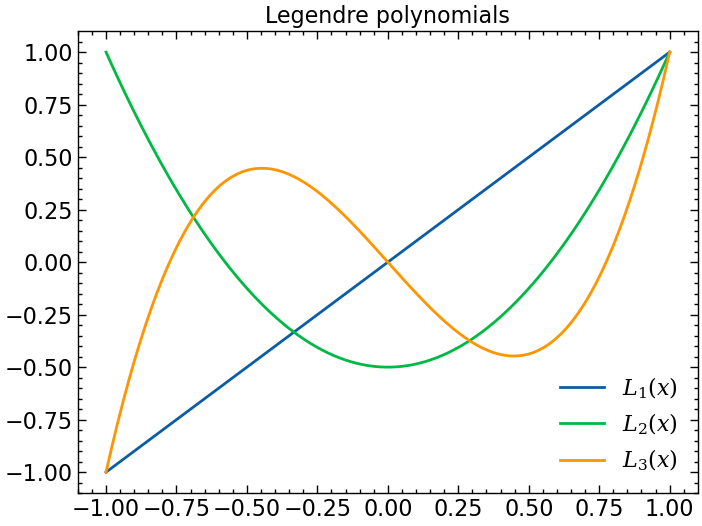

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy.special as ss

# we plot the n\in [1..3] Legendre polynomials.
#
x = np.linspace(-1.0, 1.0, 100)

for n in range(1, 4):
    y = ss.eval_legendre(n, x)
    plt.plot(x, y, label=r"$L_%d(x)$" % n)
    
plt.title("Legendre polynomials")
_ = plt.legend()    

## Αριθμητική ολοκλήρωση

Ο υπολογισμός της τιμής μιας συνάρτησης της μορφής 

$$\int_a^b f(x) dx,$$ 

με αριθμητικές μεθόδους, ονομάζεται "αριθμητική ολοκλήρωση" (ή quadature). Η βιβλιοθήκη ``SciPy`` προσφέρει πολλές συναρτήσεις για αριθμητική ολοκλήρωση, όπως οι ``quad`` και ``dblquad`` για μονά και διπλά ολοκληρώματα αντίστοιχα.

Στα παρακάτω παραδείγματα παρουσιάζουμε την βασική χρήση τους.

In [54]:
import scipy
import scipy.integrate as si

# A normalised Gauss function
def gauss(x):
    factor = (1.0 / np.sqrt(2.0 * np.pi))
    exponent = np.exp(-(x)**2 / 2.0)
    
    return factor * exponent

# lower and upper integration limits:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

result, abserr = si.quad(gauss, x_lower, x_upper)

print(f"integral value = {result}; absolute error = {abserr}")

# Also infinite limits are possible:
result, abserr = si.quad(gauss, -scipy.Inf, scipy.Inf)

print(f"integral value = {result}; absolute error = {abserr}")

integral value = 0.341344746068543; absolute error = 3.789687964201238e-15
integral value = 0.9999999999999997; absolute error = 1.017819145094224e-08


Για απλές συναρτήσεις μπορούμε να χρησιμοποιήσουμε ανώνυμες συναρτήσεις (lambda function)

In [55]:
val, abserr = si.quad(lambda x: (np.sin(x) + np.cos(x)**2),
                      0, np.pi / 2.)

print(f"result  = {val} +/- {abserr}")

result  = 1.7853981633974485 +/- 1.9821901491273147e-14


Παρόμοια μπορούμε να επιλύσουμε διπλά ολοκληρώματα

In [56]:
def integrand(x, y):
    return np.exp(-x**2 - y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

# note that the y-limits depend on x in general;
# hence they need to be given as functions of x!
val, abserr = si.dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print(val, abserr) 

0.7853981633974476 1.3753098510218528e-08
